In [1]:
# %matplotlib notebook
import numpy as np 
from astropy.io import ascii

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yu=ascii.read("sample/yu+2018.csv")

# The metallicity effect of the NIKE diagram
It seems that the edge has an effect of [Fe/H], though it is hard to spot. Sanjib mentions there is a metallicity effect from the isochrones.

Why is it not a data artifact?
Maybe arise from the unenven number of samples - hardly true after plotting according to histogram.

Text(-0.049999999999997866, 1285.2, '-0.05')

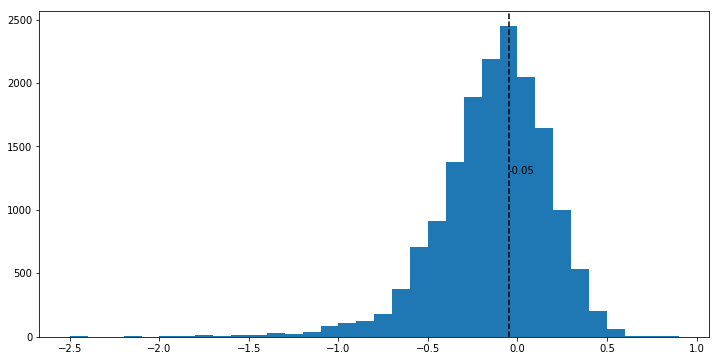

In [3]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
idx = (yu["Phase"]==2)
h = ax.hist(yu["[Fe/H]"], bins=np.arange(-2.5,1.0,0.1))

mean=h[1][np.where(h[0]==h[0].max())[0][0]]+0.05
ax.axvline(mean, linestyle="--", color="black") 
ax.text(mean, np.mean(ax.get_ylim()), "{:0.2f}".format(mean),  color="black")

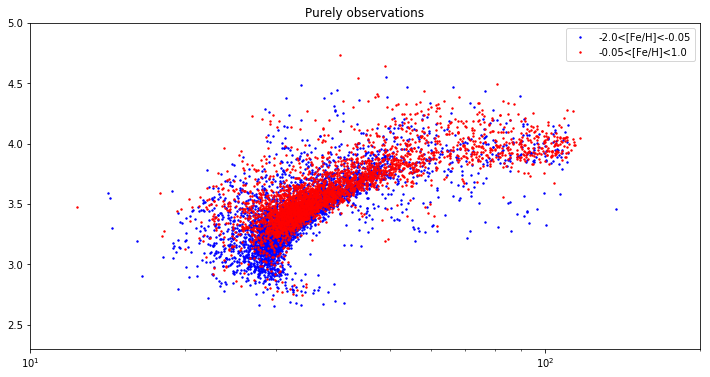

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.axis([10, 200, 2.3, 5.0])
ax.set_xscale("log")

feh_limits = [-2.0, -0.05, 1.0] 
colors = ["blue", "red"] #sns.diverging_palette(220, 20, n=len(feh_ll))
labels = ["-2.0<[Fe/H]<-0.05", "-0.05<[Fe/H]<1.0"]
for igroup in range(len(feh_limits)-1):
    idx = (yu["[Fe/H]"]>=feh_limits[igroup]) & (yu["[Fe/H]"]<feh_limits[igroup+1]) & (yu["Phase"]==2)
    x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
    ax.scatter(x, y, color=colors[igroup], s=2, label=labels[igroup])

ax.set_title("Purely observations")
ax.legend()

# idx = (yu["[Fe/H]"]>=-1.0) & (yu["[Fe/H]"]<1.0) & (yu["Phase"]==2)
# x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
# c = ax.scatter(x, y, c=yu["[Fe/H]"][idx], s=2, cmap="seismic")
# plt.colorbar(c, ax=ax, orientation='vertical')

# quantify the dege
## on the nike diagram

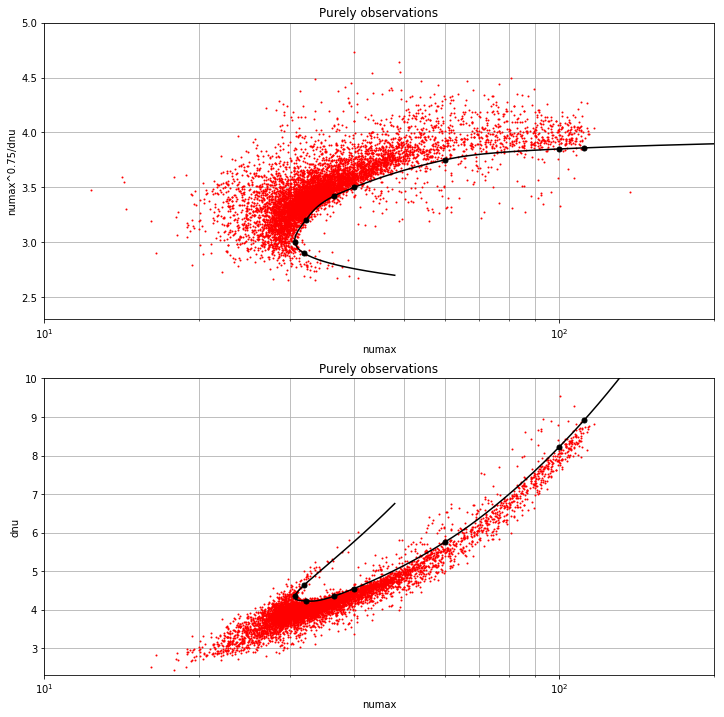

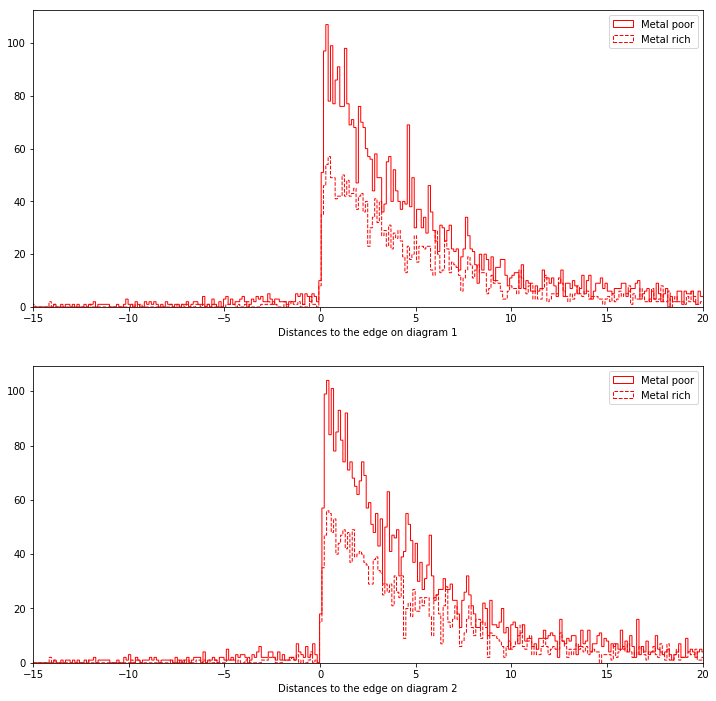

In [5]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(nrows=2,ncols=1)
axes[0].axis([10, 200, 2.3, 5.0])
axes[0].set_xscale("log")
axes[1].axis([10, 200, 2.3, 10.0])
axes[1].set_xscale("log")

idx = (yu["Phase"]==2)
xobs, yobs, yobst = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx], yu["Delnu"][idx]
Nobs = xobs.shape[0]
# plot observations
axes[0].plot(xobs, yobs, "r.", markersize=2)
axes[0].set_title("Purely observations")
axes[0].grid(which="both")
axes[0].set_xlabel("numax")
axes[0].set_ylabel("numax^0.75/dnu")
axes[1].plot(xobs, yobst, "r.", markersize=2)
axes[1].set_title("Purely observations")
axes[1].grid(which="both")
axes[1].set_xlabel("numax")
axes[1].set_ylabel("dnu")

# plot edge defining points
# points
points=[(32, 2.9), (30.7, 3.0), (32.2, 3.2), (36.5, 3.42), (40, 3.5), (60, 3.75), (100, 3.85), (112, 3.86)]
Npoint = len(points)
xpoint, ypoint = np.array([points[i][0] for i in range(Npoint)]), np.array([points[i][1] for i in range(Npoint)])
axes[0].plot(xpoint, ypoint, "k.", markersize=10)
axes[1].plot(xpoint, xpoint**0.75/ypoint, "k.", markersize=10)

# cubic spline interpolation
import scipy
tck = scipy.interpolate.splrep(np.log10(ypoint), np.log10(xpoint), s=0)
np.save("sample/spline", tck)
yedge = np.arange(2.7, 4.0, 0.001)
xedge = 10.0**scipy.interpolate.splev(np.log10(yedge), tck, der=0)
Nedge = xedge.shape[0]
axes[0].plot(xedge, yedge, "k-") 
axes[1].plot(xedge, xedge**0.75/yedge, "k-") 

# # left or right?
idx_left = xobs<=10.0**scipy.interpolate.splev(np.log10(yobs), tck, der=0)
idx_right = xobs>10.0**scipy.interpolate.splev(np.log10(yobs), tck, der=0)
idx_mrich = yu["[Fe/H]"][idx]>=0
idx_mpoor = yu["[Fe/H]"][idx]<0

# # shortest distance distribution
X = np.zeros((Nobs+Nedge, 2))
X[0:Nobs,0], X[0:Nobs,1] = xobs, yobs
X[Nobs:,0], X[Nobs:,1] = xedge, yedge
Y = scipy.spatial.distance.pdist(X)
sdist=Y[0:Nobs]
sdist[idx_right]=-sdist[idx_right]
np.save("sample/edge_nike", X[Nobs:,])

X[0:Nobs,0], X[0:Nobs,1] = xobs, yobst
X[Nobs:,0], X[Nobs:,1] = xedge, xedge**0.75/yedge
Y = scipy.spatial.distance.pdist(X)
sdistt=Y[0:Nobs]
sdistt[idx_right]=-sdistt[idx_right]


fig = plt.figure(figsize=(12,12))
axes = fig.subplots(nrows=2,ncols=1)
axes[0].set_xlim(-15, 20)
axes[1].set_xlim(-15, 20)
bins0 = np.linspace(sdist.min(), sdist.max(), 1500)
bins1 = np.linspace(sdistt.min(), sdistt.max(), 1500)
h=axes[0].hist(sdist[idx_mpoor], color="red", histtype="step", label="Metal poor",
    bins=bins0, zorder=0)
h=axes[0].hist(sdist[idx_mrich], color="red", linestyle="--", histtype="step", label="Metal rich",
    bins=bins0, zorder=0)
h=axes[1].hist(sdistt[idx_mpoor], color="red", histtype="step", label="Metal poor",
    bins=bins1, zorder=0)
h=axes[1].hist(sdistt[idx_mrich], color="red", linestyle="--", histtype="step", label="Metal rich",
    bins=bins1, zorder=0)
axes[0].set_xlabel("Distances to the edge on diagram 1")
axes[0].legend()
axes[1].set_xlabel("Distances to the edge on diagram 2")
axes[1].legend()

Text(0.5, 0, 'Distances to the edge on diagram 1')

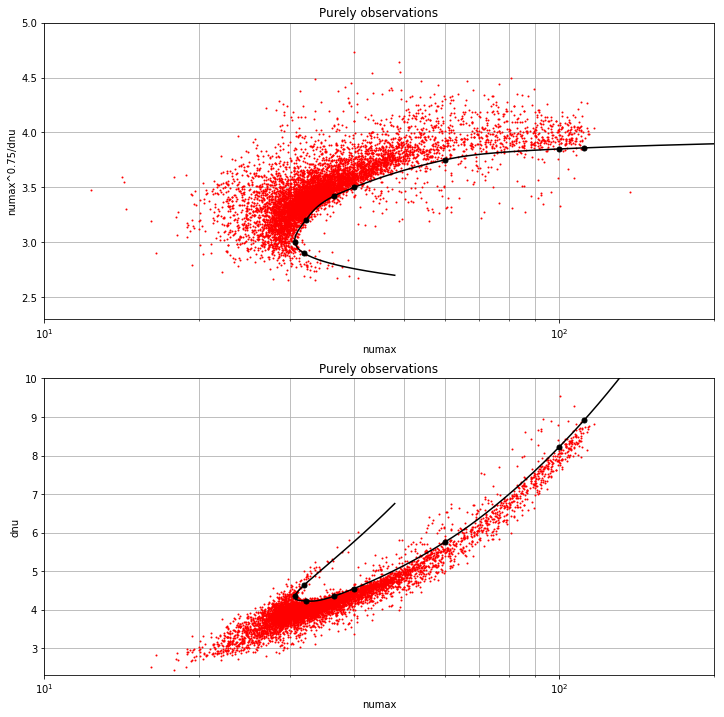

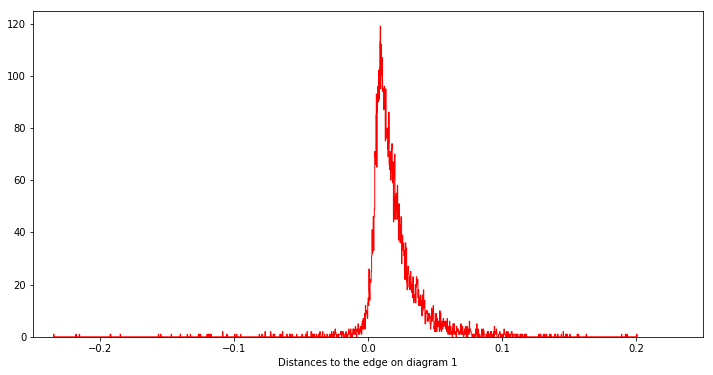

In [23]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(nrows=2,ncols=1)
axes[0].axis([10, 200, 2.3, 5.0])
axes[0].set_xscale("log")
axes[1].axis([10, 200, 2.3, 10.0])
axes[1].set_xscale("log")

idx = (yu["Phase"]==2)
xobs, yobs, yobst = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx], yu["Delnu"][idx]
Nobs = xobs.shape[0]
# plot observations
axes[0].plot(xobs, yobs, "r.", markersize=2)
axes[0].set_title("Purely observations")
axes[0].grid(which="both")
axes[0].set_xlabel("numax")
axes[0].set_ylabel("numax^0.75/dnu")
axes[1].plot(xobs, yobst, "r.", markersize=2)
axes[1].set_title("Purely observations")
axes[1].grid(which="both")
axes[1].set_xlabel("numax")
axes[1].set_ylabel("dnu")

# plot edge defining points
# points
points=[(32, 2.9), (30.7, 3.0), (32.2, 3.2), (36.5, 3.42), (40, 3.5), (60, 3.75), (100, 3.85), (112, 3.86)]
Npoint = len(points)
xpoint, ypoint = np.array([points[i][0] for i in range(Npoint)]), np.array([points[i][1] for i in range(Npoint)])
axes[0].plot(xpoint, ypoint, "k.", markersize=10)
axes[1].plot(xpoint, xpoint**0.75/ypoint, "k.", markersize=10)

# cubic spline interpolation
import scipy
tck = scipy.interpolate.splrep(np.log10(ypoint), np.log10(xpoint), s=0)
np.save("sample/spline", tck)
yedge = np.arange(2.7, 4.0, 0.001)
xedge = 10.0**scipy.interpolate.splev(np.log10(yedge), tck, der=0)
Nedge = xedge.shape[0]
axes[0].plot(xedge, yedge, "k-") 
axes[1].plot(xedge, xedge**0.75/yedge, "k-") 

# # left or right?
idx_mrich = yu["[Fe/H]"][idx]>=0
idx_mpoor = yu["[Fe/H]"][idx]<0


# # shortest distance distribution
xobs_edge = 10.0**scipy.interpolate.splev(np.log10(yobs), tck, der=0)
xobs_edge_prime = scipy.interpolate.splev(np.log10(yobs), tck, der=1)
sdist = (np.log10(xobs_edge)-np.log10(xobs))/(xobs_edge_prime**2. + 1)**0.5


fig = plt.figure(figsize=(12,6))
axes = [fig.subplots(nrows=1,ncols=1)]
axes[0].set_xlim(-0.25, 0.25)
# axes[1].set_xlim(-15, 20)
bins0 = np.linspace(sdist.min(), sdist.max(), 1500)
# bins1 = np.linspace(sdistt.min(), sdistt.max(), 1500)
h=axes[0].hist(sdist, color="red", histtype="step", label="Metal poor",
    bins=bins0, zorder=0)
# h=axes[1].hist(sdistt, color="red", histtype="step", label="Metal poor",
#     bins=bins1, zorder=0)
axes[0].set_xlabel("Distances to the edge on diagram 1")
# axes[0].legend()
# axes[1].set_xlabel("Distances to the edge on diagram 2")
# axes[1].legend()

## on the dnu-numax diagram

In [20]:
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a104bd630>],
      dtype=object)